In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
data = pd.read_excel("RAW_data_ML_211222 (1).xlsx", engine='openpyxl')
data.head()

,RID,step1,step2,step3,step4,step5,no_DM_Dx,no_DM_test,FHx,area,...,AS6_GLU60_TR,AS6_GLU120_TR,AS7_PDFDM,AS7_HBA1C,AS7_GLU0_TR,AS7_GLU60_TR,AS7_GLU120_TR,AS7_INS0,AS7_INS60,AS7_INS120
0,EPI19_046_000001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,...,91.0,83.0,1.0,5.4,87.0,135.0,79.0,6.6,36.6,26.7
1,EPI19_046_000002,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,2,...,99999.0,99999.0,1.0,6.7,124.0,99999.0,99999.0,6.7,99999.0,99999.0
2,EPI19_046_000003,1.0,NaN,1.0,1.0,1.0,1.0,1.0,0,1,...,99999.0,99999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EPI19_046_000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,...,99999.0,99999.0,1.0,8.0,120.0,99999.0,99999.0,3.2,99999.0,99999.0
4,EPI19_046_000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data.columns

Index(['RID', 'step1', 'step2', 'step3', 'step4', 'step5', 'no_DM_Dx',
       'no_DM_test', 'FHx', 'area',
       ...
       'AS6_GLU60_TR', 'AS6_GLU120_TR', 'AS7_PDFDM', 'AS7_HBA1C',
       'AS7_GLU0_TR', 'AS7_GLU60_TR', 'AS7_GLU120_TR', 'AS7_INS0', 'AS7_INS60',
       'AS7_INS120'],
      dtype='object', length=119)

In [18]:
# 데이터 중 'NA'와 99999값들을 둘다 결측치(nan)값 화
data= data.replace('NA', np.nan)
data= data.replace(99999.0, np.nan)
data.head()

,RID,step1,step2,step3,step4,step5,no_DM_Dx,no_DM_test,FHx,area,...,AS6_GLU60_TR,AS6_GLU120_TR,AS7_PDFDM,AS7_HBA1C,AS7_GLU0_TR,AS7_GLU60_TR,AS7_GLU120_TR,AS7_INS0,AS7_INS60,AS7_INS120
0,EPI19_046_000001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,...,91.0,83.0,1.0,5.4,87.0,135.0,79.0,6.6,36.6,26.7
1,EPI19_046_000002,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,2,...,NaN,NaN,1.0,6.7,124.0,NaN,NaN,6.7,NaN,NaN
2,EPI19_046_000003,1.0,NaN,1.0,1.0,1.0,1.0,1.0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EPI19_046_000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,...,NaN,NaN,1.0,8.0,120.0,NaN,NaN,3.2,NaN,NaN
4,EPI19_046_000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10030 entries, 0 to 10029
Data columns (total 119 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RID                10030 non-null  object 
 1   step1              8525 non-null   float64
 2   step2              8147 non-null   float64
 3   step3              8511 non-null   float64
 4   step4              8510 non-null   float64
 5   step5              7503 non-null   float64
 6   no_DM_Dx           9355 non-null   float64
 7   no_DM_test         8620 non-null   float64
 8   FHx                10030 non-null  int64  
 9   area               10030 non-null  int64  
 10  sex                10030 non-null  int64  
 11  age                10030 non-null  int64  
 12  glu0               9731 non-null   float64
 13  glu60              9515 non-null   float64
 14  glu120             9523 non-null   float64
 15  HbA1c              10027 non-null  float64
 16  eGFR               10

In [20]:
# step 1~5까지는 결측값 정제를 위한 항목별 선별
# 피검사 결과가 있는 경우

data['step4'].value_counts()

#data = data.dropna(subset=['step4'])
# 해보려고 했으나 해당 작업 실시시 당뇨병이 아닌 환자만 남음

1.0    8510
Name: step4, dtype: int64

In [21]:
# no_DM_test: HbA1c, OGTT 검사상 당뇨병이 아닌 환자 yes(1)
# HbA1c 검사? 당화혈색소 수치가 6.5% 이상이면 당뇨로 진단
# OGTT 검사? 
# no_DM_test가 1이라고 나머지 데이터가 전부 당뇨병 환자의 데이터라고 할 수 있는가? 
# 결측치 처리를 어떻게 해야할지 고민 필요 => 모델로 예측?

print(data['no_DM_test'].value_counts())

1.0    8620
Name: no_DM_test, dtype: int64


In [22]:
# 당화혈색소 검사 결과가 있는 데이터 확인
# HBA1C >= 6.5: 당뇨(0)

cond = data[data['HbA1c']>=6.5]
for i in data[data['HbA1c']>=6.5].index:
    data.at[i, 'no_DM_test'] = 0


In [23]:
data['no_DM_test'].value_counts()

1.0    8620
0.0    1000
Name: no_DM_test, dtype: int64

In [24]:
# 공복혈당 >126 or 식후 2시간 혈당 >200: 당뇨

for i in data[(data['glu0']>126) | (data['glu120']>200)].index:
    data.at[i, 'no_DM_test'] = 0

print(data['no_DM_test'].value_counts())
print('null 값 개수:', data['no_DM_test'].isnull().sum())

1.0    8620
0.0    1276
Name: no_DM_test, dtype: int64
null 값 개수: 134


In [25]:
pd.options.display.max_rows = None

cnt = pd.DataFrame(data[data['no_DM_test'].isnull()].isnull().sum())
cnt

,0
RID,0
step1,134
step2,134
step3,134
step4,134
step5,134
no_DM_Dx,62
no_DM_test,134
FHx,0
area,0


In [26]:
import xgboost as xgb
# xgboost를 사용해 결측치 처리
df_temp = data.copy()
df_temp = df_temp.drop(['RID'],axis=1)
xgbr = xgb.XGBClassifier()
df_train = df_temp[~df_temp['no_DM_test'].isnull()]
y = df_train['no_DM_test'].values
df_train = df_train.drop(['no_DM_test'],axis=1)
df_test = df_temp[df_temp['no_DM_test'].isnull()]
df_test = df_test.drop(['no_DM_test'],axis=1)

xgbr = xgbr.fit(df_train, y)
pred_values = xgbr.predict(df_test)

ModuleNotFoundError: No module named 'xgboost'

In [103]:
len(df_test)

134

In [27]:
data['no_DM_test'].value_counts()

1.0    8620
0.0    1276
Name: no_DM_test, dtype: int64

In [28]:
for i in data[data['no_DM_test'].isnull()].index:
    data.at[i, 'no_DM_test'] = 0

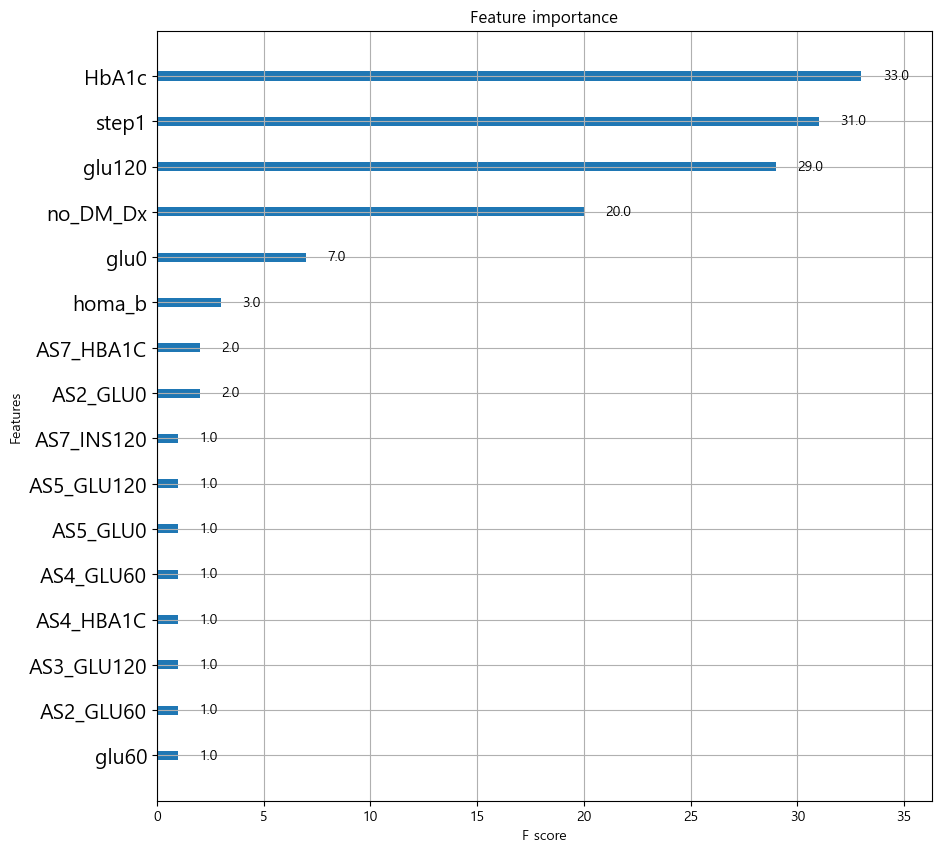

In [106]:
# feature importance plot
from xgboost import plot_importance

plt.rcParams['figure.figsize'] = 10, 10
plot_importance(xgbr)

plt.yticks(fontsize=15)
plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


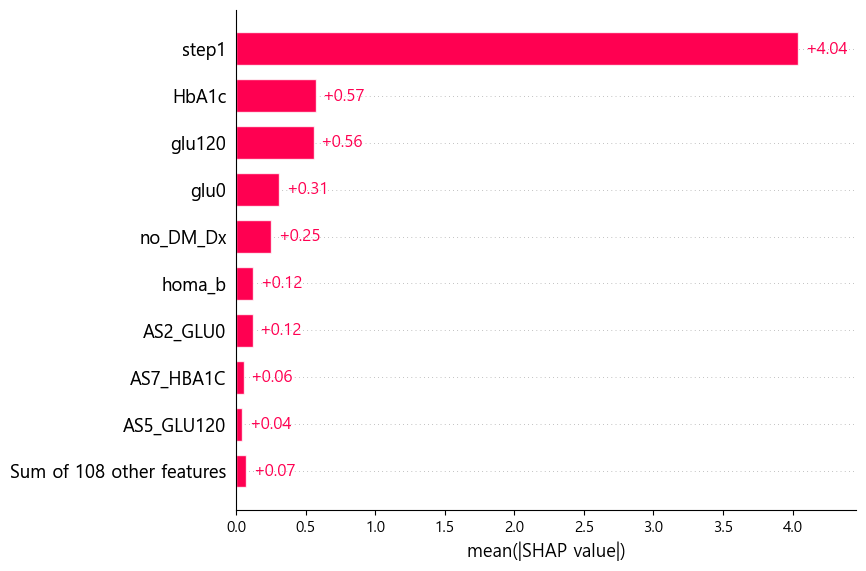

In [107]:
import shap

explainer = shap.Explainer(xgbr)
shap_values = explainer(df_train)

shap.plots.bar(shap_values)

In [108]:
# 글루코스나 HBA1C는 당뇨 판별 검사 따라서 해당 변수를 제외하고 예측한다고 했을 때 결과
# 해당 변수들을 제외하고 예측한다고 했을 떄 feature importance 확인 필요

feature = ['FHx', 'sex', 'age', 'CRP', 'marriage', 'education', 'salary','drink','smoking','activity',
           'wh_ratio', 'AS1_waist', 'AS1_hip', 'wcrisk', 'AS1_BMI', 'AS1_HEIGHT', 'AS1_WEIGHT', 'SBP',
           'DBP', 'corisk', 'bprisk','lipidrisk','MetS','bprisk2','lipidrisk2','MetS2','Tchol','TG','HDL', 'no_DM_test']

feature_data = data[feature]
feature_data.head()

,FHx,sex,age,CRP,marriage,education,salary,drink,smoking,activity,...,bprisk,lipidrisk,MetS,bprisk2,lipidrisk2,MetS2,Tchol,TG,HDL,no_DM_test
0,0,2,69,0.01,1.0,1.0,1.0,1.0,1.0,0.0,...,1,1,2,1,1,2,193.0,119.0,37.0,1.0
1,1,2,42,0.09,1.0,1.0,1.0,3.0,1.0,0.0,...,0,1,1,0,1,1,187.0,141.0,41.0,0.0
2,0,2,63,0.04,1.0,1.0,1.0,3.0,NaN,1.0,...,0,1,1,0,1,1,175.0,133.0,36.0,1.0
3,0,1,56,0.01,1.0,1.0,3.0,1.0,1.0,1.0,...,0,0,0,0,0,0,201.0,57.0,62.0,0.0
4,1,1,53,0.25,0.0,1.0,2.0,1.0,1.0,0.0,...,0,1,2,1,1,3,192.0,169.0,27.0,0.0


In [109]:
len(feature_data[feature_data['no_DM_test'].isnull()])

0

In [110]:
from sklearn.model_selection import train_test_split
X = feature_data.iloc[:, :-1]
y = feature_data.iloc[:, -1]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify=y)

xgbc = xgb.XGBClassifier()

xgbc = xgbc.fit(train_X, train_y)

pred_probs = xgbc.predict(test_X)
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]



In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [112]:
get_clf_eval(test_y, preds)

오차행렬:
 [[  48  375]
 [  69 2517]]

정확도: 0.8524
정밀도: 0.8703
재현율: 0.9733
F1: 0.9189
AUC: 0.5434


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

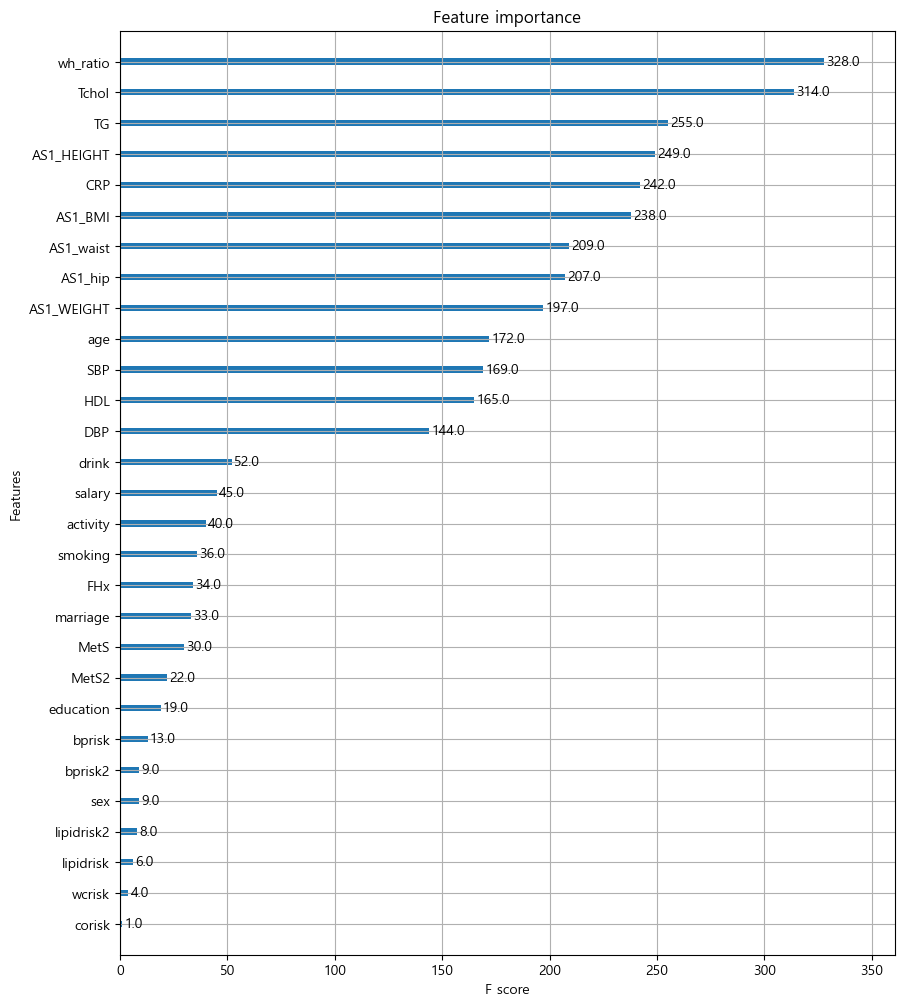

In [113]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax)

In [114]:
explainer = shap.Explainer(xgbc)
shap_values = explainer(train_X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Glyph 8722 (\N{MINUS SIGN}) missing from current font.


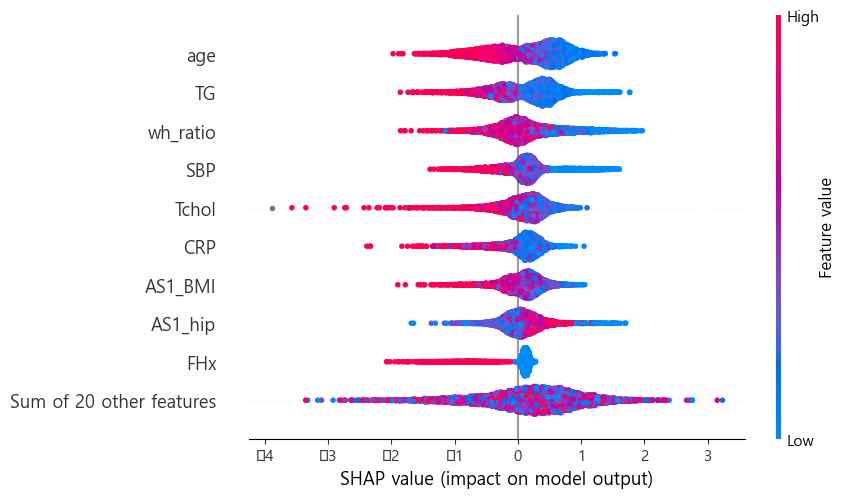

In [115]:
shap.plots.beeswarm(shap_values)

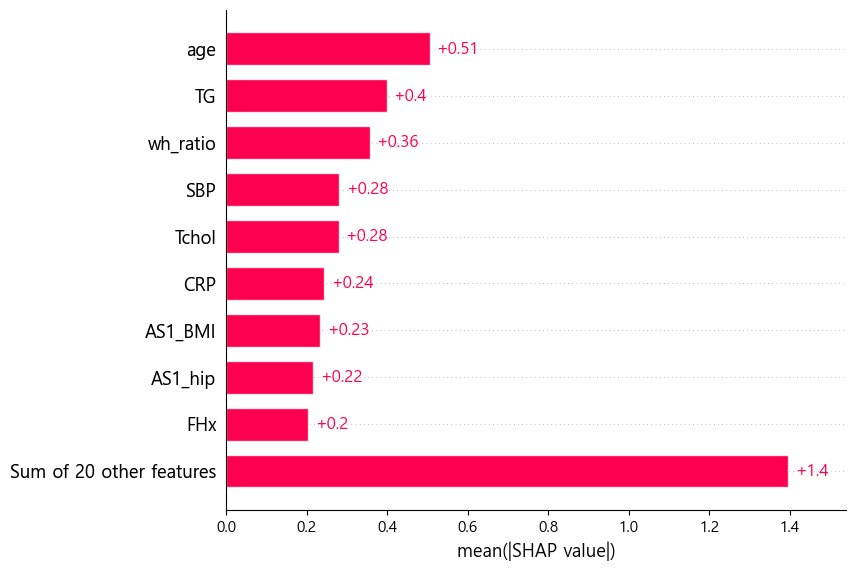

In [116]:
shap.plots.bar(shap_values)

In [117]:
# 시계열 데이터 분석을 위한 데이터 분리

time_series_data = data[['glu0', 'glu60', 'glu120', 'HbA1c', 'AS1_INS0', 'AS1_INS60', 'AS1_INS120',
                     'as1y', 'as1m', 'as2y', 'as2m', 'as3y', 'as3m', 'as4y', 'as4m', 'as5y', 'as5m', 'as6y', 'as6m', 'as7y', 'as7m',
                    'timepoint', 'time_DM', 'newDM',
                    'AS2_PDFDM',"AS2_HBA1C",'AS2_GLU0','AS2_GLU60','AS2_GLU120','AS2_INS0','AS2_INS60','AS2_INS120',
                    'AS3_PDFDM','AS3_HBA1C','AS3_GLU0','AS3_GLU60','AS3_GLU120',
                    'AS4_PDFDM','AS4_HBA1C','AS4_GLU0','AS4_GLU60','AS4_GLU120',
                    'AS5_PDFDM','AS5_HBA1C','AS5_GLU0','AS5_GLU60','AS5_GLU120',
                    'AS6_PDFDM','AS6_HBA1C','AS6_GLU0_TR','AS6_GLU60_TR','AS6_GLU120_TR',
                    'AS7_PDFDM','AS7_HBA1C','AS7_GLU0_TR','AS7_GLU60_TR','AS7_GLU120_TR','AS7_INS0','AS7_INS60','AS7_INS120']]

In [4]:
# 앞으로 당뇨가 일어날지 예측한다면 해당 데이터를 사용해 분석?
# 해당 열을 독립변수로 사용
data['newDM'].value_counts()

0.0    6050
1.0    1453
Name: newDM, dtype: int64

In [5]:
len(data[(data['no_DM_test']==1)&(data['newDM'] == 1)])

1453

In [6]:
# 따로 저장해서 사용 

df = data[data['newDM'].notnull()]

In [8]:
df.to_csv("data.csv", index = False)

In [126]:


# 시계열 데이터 삭제
df = df.iloc[:, 1:83]
df = df.drop(['as1y', 'as1m', 'as2y', 'as2m', 'as3y', 'as3m', 'as4y', 'as4m', 'as5y', 'as5m', 'as6y', 'as6m', 'as7y', 'as7m','timepoint', 'time_DM'], axis=1)
df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7503 entries, 0 to 10029
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   step1              7503 non-null   float64
 1   step2              7184 non-null   float64
 2   step3              7490 non-null   float64
 3   step4              7490 non-null   float64
 4   step5              7503 non-null   float64
 5   no_DM_Dx           7503 non-null   float64
 6   no_DM_test         7503 non-null   float64
 7   FHx                7503 non-null   int64  
 8   area               7503 non-null   int64  
 9   sex                7503 non-null   int64  
 10  age                7503 non-null   int64  
 11  glu0               7503 non-null   float64
 12  glu60              7491 non-null   float64
 13  glu120             7503 non-null   float64
 14  HbA1c              7503 non-null   float64
 15  eGFR               7503 non-null   float64
 16  CRP                7503

null_counts is deprecated. Use show_counts instead


In [127]:
y = df['newDM']
X = df.drop(['newDM'], axis=1)


In [128]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify=y)

xgbc = xgb.XGBClassifier()

xgbc = xgbc.fit(train_X, train_y)

pred_probs = xgbc.predict(test_X)
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]

In [129]:
get_clf_eval(test_y, preds)

오차행렬:
 [[1709  106]
 [ 277  159]]

정확도: 0.8299
정밀도: 0.6000
재현율: 0.3647
F1: 0.4536
AUC: 0.6531


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

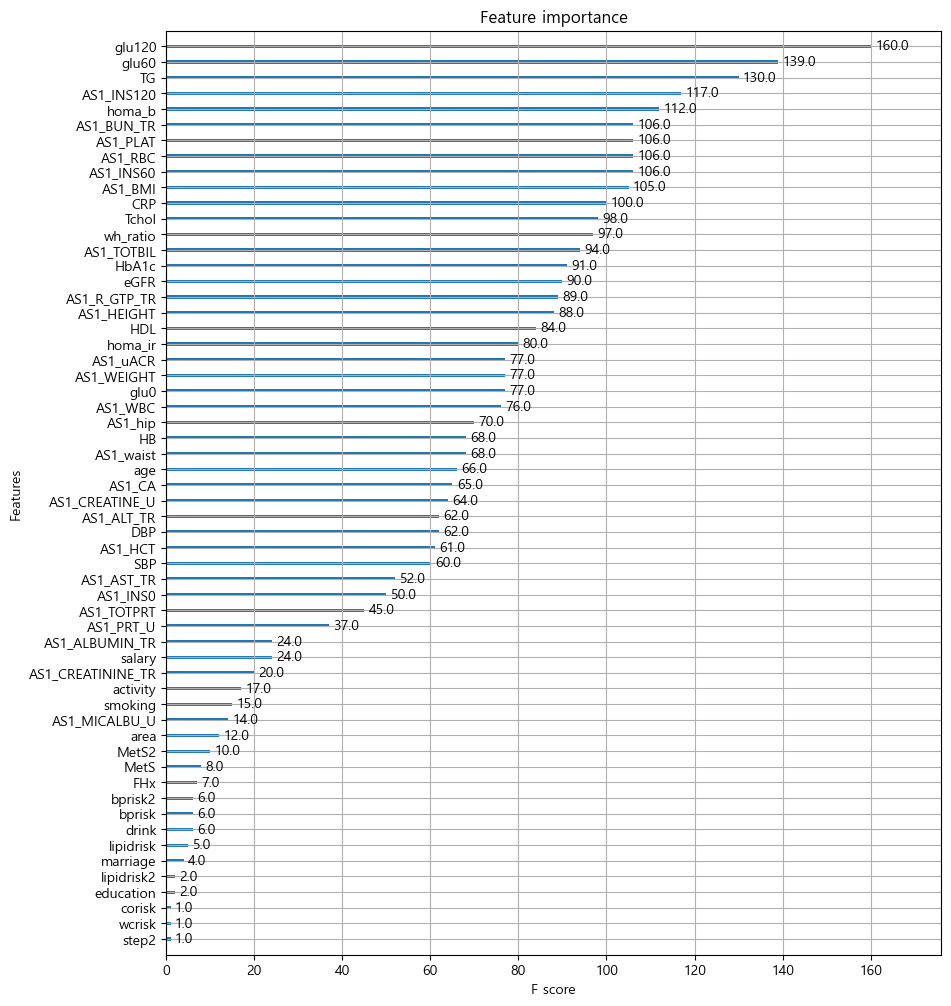

In [130]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax)

In [131]:
explainer = shap.Explainer(xgbc)
shap_values = explainer(train_X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Glyph 8722 (\N{MINUS SIGN}) missing from current font.


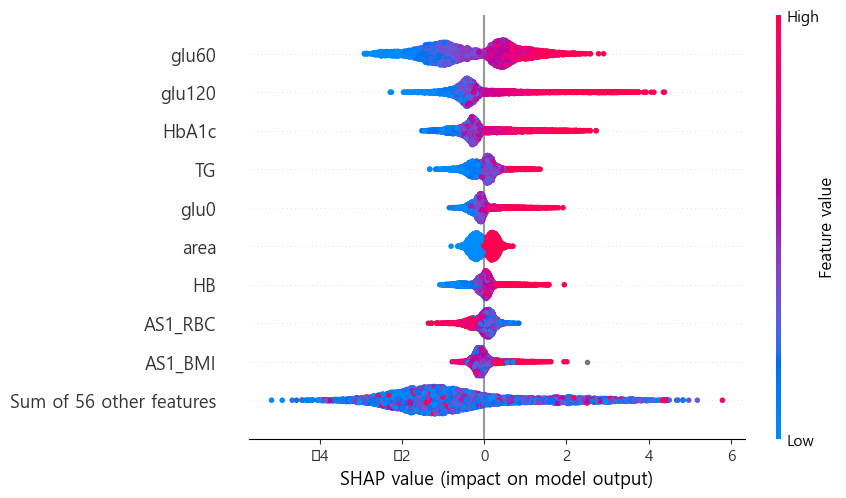

In [132]:
shap.plots.beeswarm(shap_values)

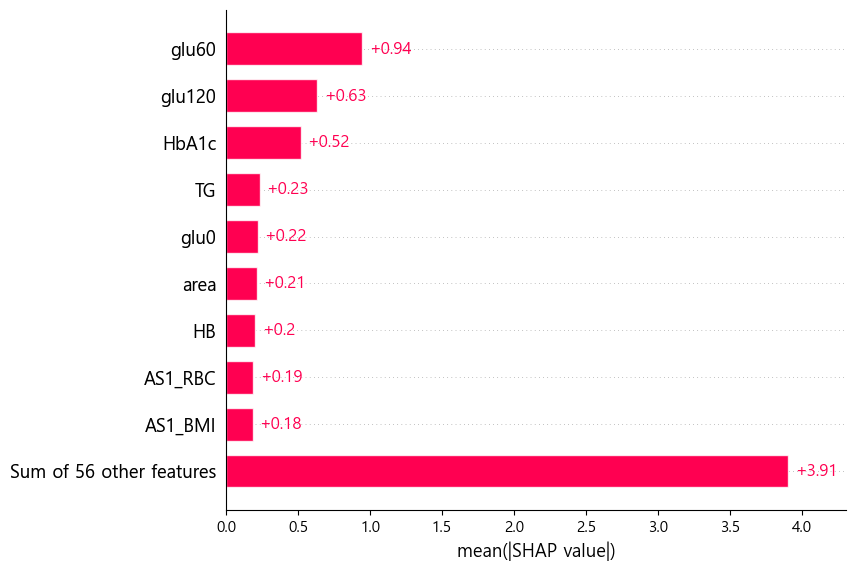

In [133]:
shap.plots.bar(shap_values)

In [135]:
# 시계열 데이터 포함
df = data[data['newDM'].notnull()]

df = df.iloc[:, 1:]
df = df.drop(['as1y', 'as1m', 'as2y', 'as2m', 'as3y', 'as3m', 'as4y', 'as4m', 'as5y', 'as5m', 'as6y', 'as6m', 'as7y', 'as7m','timepoint', 'time_DM'], axis=1)
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7503 entries, 0 to 10029
Data columns (total 102 columns):
 #    Column             Non-Null Count  Dtype  
---   ------             --------------  -----  
 0    step1              7503 non-null   float64
 1    step2              7184 non-null   float64
 2    step3              7490 non-null   float64
 3    step4              7490 non-null   float64
 4    step5              7503 non-null   float64
 5    no_DM_Dx           7503 non-null   float64
 6    no_DM_test         7503 non-null   float64
 7    FHx                7503 non-null   int64  
 8    area               7503 non-null   int64  
 9    sex                7503 non-null   int64  
 10   age                7503 non-null   int64  
 11   glu0               7503 non-null   float64
 12   glu60              7491 non-null   float64
 13   glu120             7503 non-null   float64
 14   HbA1c              7503 non-null   float64
 15   eGFR               7503 non-null   float64
 16   CRP

null_counts is deprecated. Use show_counts instead


In [136]:
y = df['newDM']
X = df.drop(['newDM'], axis=1)

In [137]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify=y)

xgbc = xgb.XGBClassifier()

xgbc = xgbc.fit(train_X, train_y)

pred_probs = xgbc.predict(test_X)
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]

In [138]:
get_clf_eval(test_y, preds)

오차행렬:
 [[1811    4]
 [  29  407]]

정확도: 0.9853
정밀도: 0.9903
재현율: 0.9335
F1: 0.9610
AUC: 0.9656


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

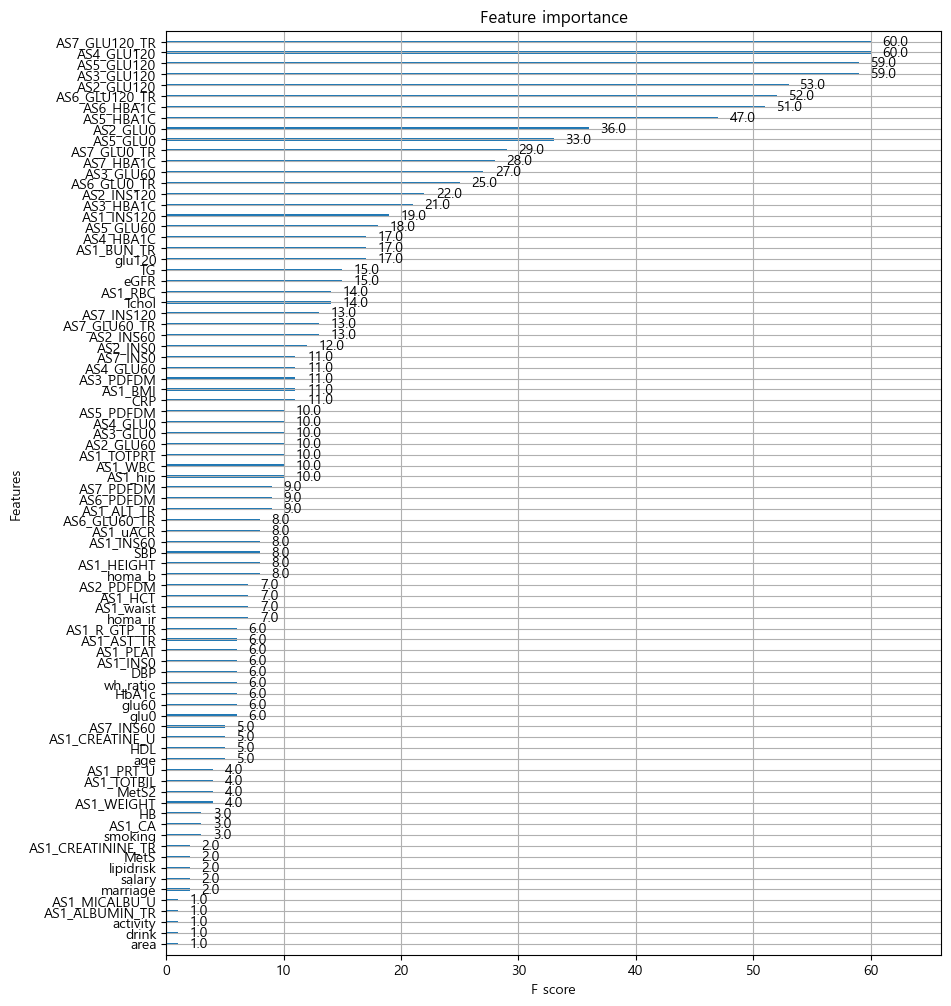

In [139]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax)

In [140]:
explainer = shap.Explainer(xgbc)
shap_values = explainer(train_X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Glyph 8722 (\N{MINUS SIGN}) missing from current font.


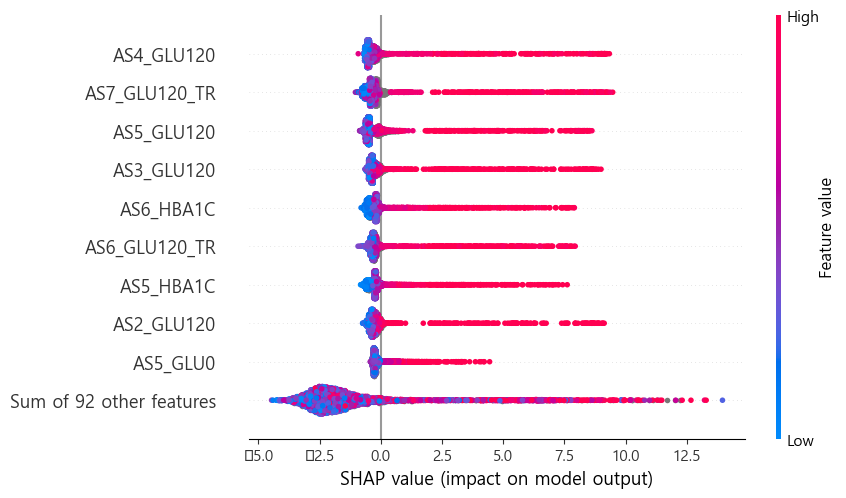

In [141]:
shap.plots.beeswarm(shap_values)

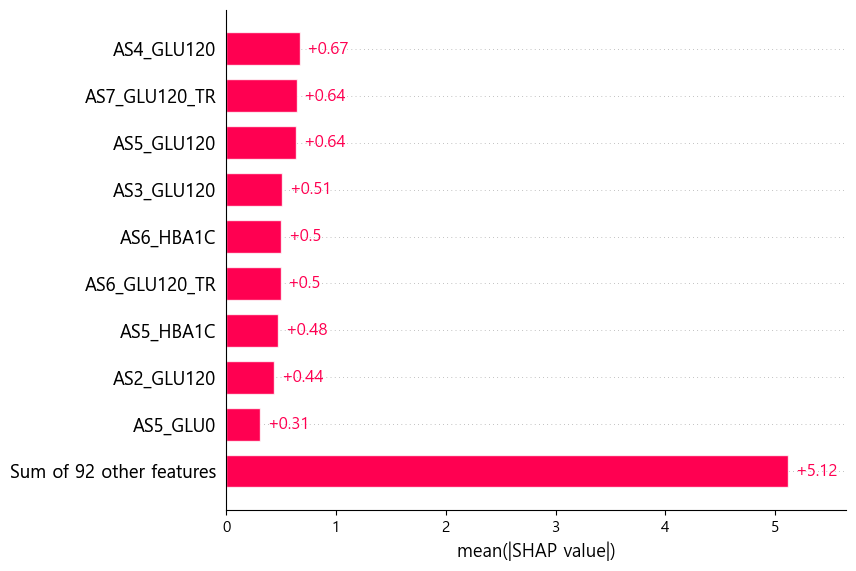

In [142]:
shap.plots.bar(shap_values)

# 전처리 후 코드

In [27]:
data_preprocessing = pd.read_csv('preprocess1_data.csv')
data_preprocessing = data_preprocessing.drop(['Unnamed: 0'], axis=1)
data_preprocessing.head()

,step1,step2,step3,step4,step5,no_DM_Dx,no_DM_test,FHx,area,sex,...,AS7_PDFDM,AS7_HBA1C,AS7_GLU0_TR,AS7_GLU60_TR,AS7_GLU120_TR,AS7_INS0,AS7_INS60,AS7_INS120,SH_T,HbA1c_T
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,2,...,1.0,5.4,87.0,135.0,79.0,6.6,36.6,26.7,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,2,2,...,1.0,6.7,124.0,99999.0,99999.0,6.7,99999.0,99999.0,0,1
2,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,1,...,1.0,8.0,120.0,99999.0,99999.0,3.2,99999.0,99999.0,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [28]:
# 시계열 데이터 삭제
data_preprocessing= data_preprocessing.replace('NA', np.nan)
data_preprocessing= data_preprocessing.replace(99999.0, np.nan)
preprocessing_df = data_preprocessing[data_preprocessing['newDM'].notnull()]
preprocessing_df = preprocessing_df.iloc[:, 7:82]
# 시계열 데이터 삭제
preprocessing_df = preprocessing_df.drop(['as1y', 'as1m', 'as2y', 'as2m', 'as3y', 'as3m', 'as4y', 'as4m', 'as5y', 'as5m', 'as6y', 'as6m', 'as7y', 'as7m','timepoint', 'time_DM'], axis=1)
preprocessing_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7503 entries, 0 to 10029
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FHx                7503 non-null   int64  
 1   area               7503 non-null   int64  
 2   sex                7503 non-null   int64  
 3   age                7503 non-null   int64  
 4   glu0               7503 non-null   float64
 5   glu60              7491 non-null   float64
 6   glu120             7503 non-null   float64
 7   HbA1c              7503 non-null   float64
 8   eGFR               7503 non-null   float64
 9   CRP                7503 non-null   float64
 10  homa_ir            7503 non-null   float64
 11  homa_b             7492 non-null   float64
 12  marriage           7459 non-null   float64
 13  education          7444 non-null   float64
 14  salary             7373 non-null   float64
 15  drink              7439 non-null   float64
 16  smoking            7413

null_counts is deprecated. Use show_counts instead


In [29]:
y = preprocessing_df['newDM']
X = preprocessing_df.drop(['newDM'], axis=1)

In [30]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify=y)

xgbc = xgb.XGBClassifier()

xgbc = xgbc.fit(train_X, train_y)

pred_probs = xgbc.predict(test_X)
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [38]:
get_clf_eval(test_y, preds)

오차행렬:
 [[1709  106]
 [ 281  155]]

정확도: 0.8281
정밀도: 0.5939
재현율: 0.3555
F1: 0.4448
AUC: 0.6486


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

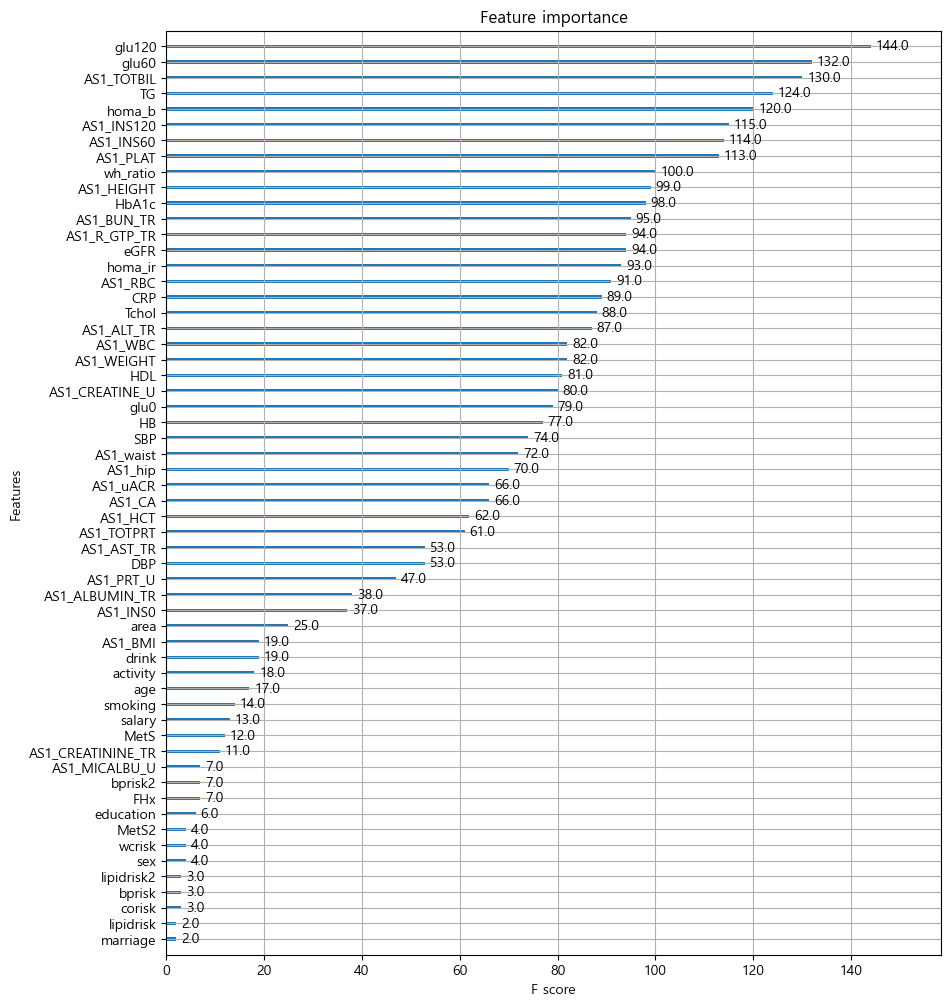

In [39]:
from xgboost import plot_importance
import shap

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax)

In [40]:
explainer = shap.Explainer(xgbc)
shap_values = explainer(train_X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Glyph 8722 (\N{MINUS SIGN}) missing from current font.


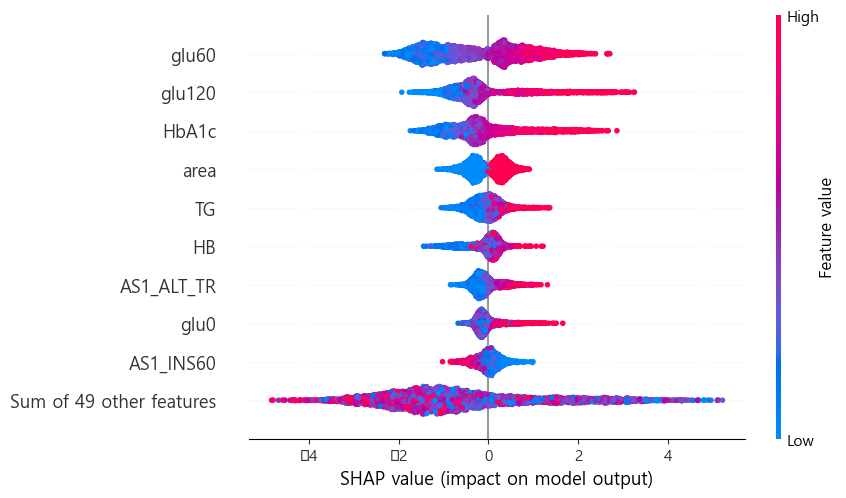

In [41]:
shap.plots.beeswarm(shap_values)

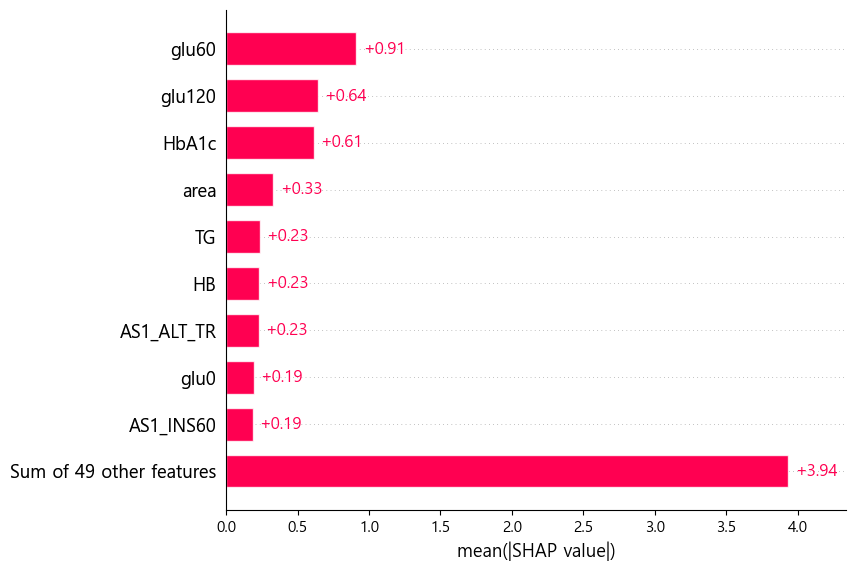

In [42]:
shap.plots.bar(shap_values)